In [1]:
import sys
sys.path.insert(0, '..//src')

import numpy as np
import pandas as pd 

import global_func as gf
import predict
import data_preprocessing as dp

config_dir = '..\\config\\'
data_proc_dir = '..\\' + gf.read_config(config_dir=config_dir, section='DIR', key='DATA_PROCESSED')
models_dir = '..\\' + gf.read_config(config_dir=config_dir, section='DIR', key='MODELS')
data_remod_dir = '..\\' + gf.read_config(config_dir=config_dir, section='DIR', key='DATA_REMODEL')

In [2]:
df_train = gf.load_from_pkl(f'{data_proc_dir}df_train_05_stdz.pkl')
df_valid = gf.load_from_pkl(f'{data_proc_dir}df_valid_05_stdz.pkl')
df_test = gf.load_from_pkl(f'{data_proc_dir}df_test_05_stdz.pkl')
df_train.name, df_valid.name, df_test.name = 'DATA TRAIN','DATA VALID','DATA TEST'

#gf.plotting_line_all(dataframe=df_train)

In [3]:
fname = models_dir + gf.read_config(config_dir=config_dir, section='FILENAME', key='MODEL') + '.pkl'
model = gf.load_from_pkl(filename=fname)

fname = data_remod_dir + gf.read_config(config_dir=config_dir, section='FILENAME', key='SCALER') + '.pkl'
scaler = gf.load_from_pkl(filename=fname)

Predictor = predict.Predictor(model=model, scaler=scaler)

In [6]:
prior = [100.23,200.23,300.23,np.NaN,500,440.23,330.23,202.23,np.NaN]
current = [10100.669,202.669,303.669,604.669,np.NaN,449.669,339.669,292.669,119.669]

df = Predictor.parsing_data(prior=prior, current=current)
print(Predictor.input_dict)
df

{'date': 'yyyymmdd', 'jci': 0, 'idx30': 0, 'eido': 0, 'spy': 0, 'dom_b': 0, 'dom_s': 0, 'for_b': 0, 'for_s': 0}


,jci,idx30,eido,spy,dom_b,dom_s,for_b,for_s
date,,,,,,,,
2022-11-17,100.230,200.230,300.230,0.000,500.0,440.230,330.230,202.230
2022-11-18,10100.669,202.669,303.669,604.669,0.0,449.669,339.669,292.669


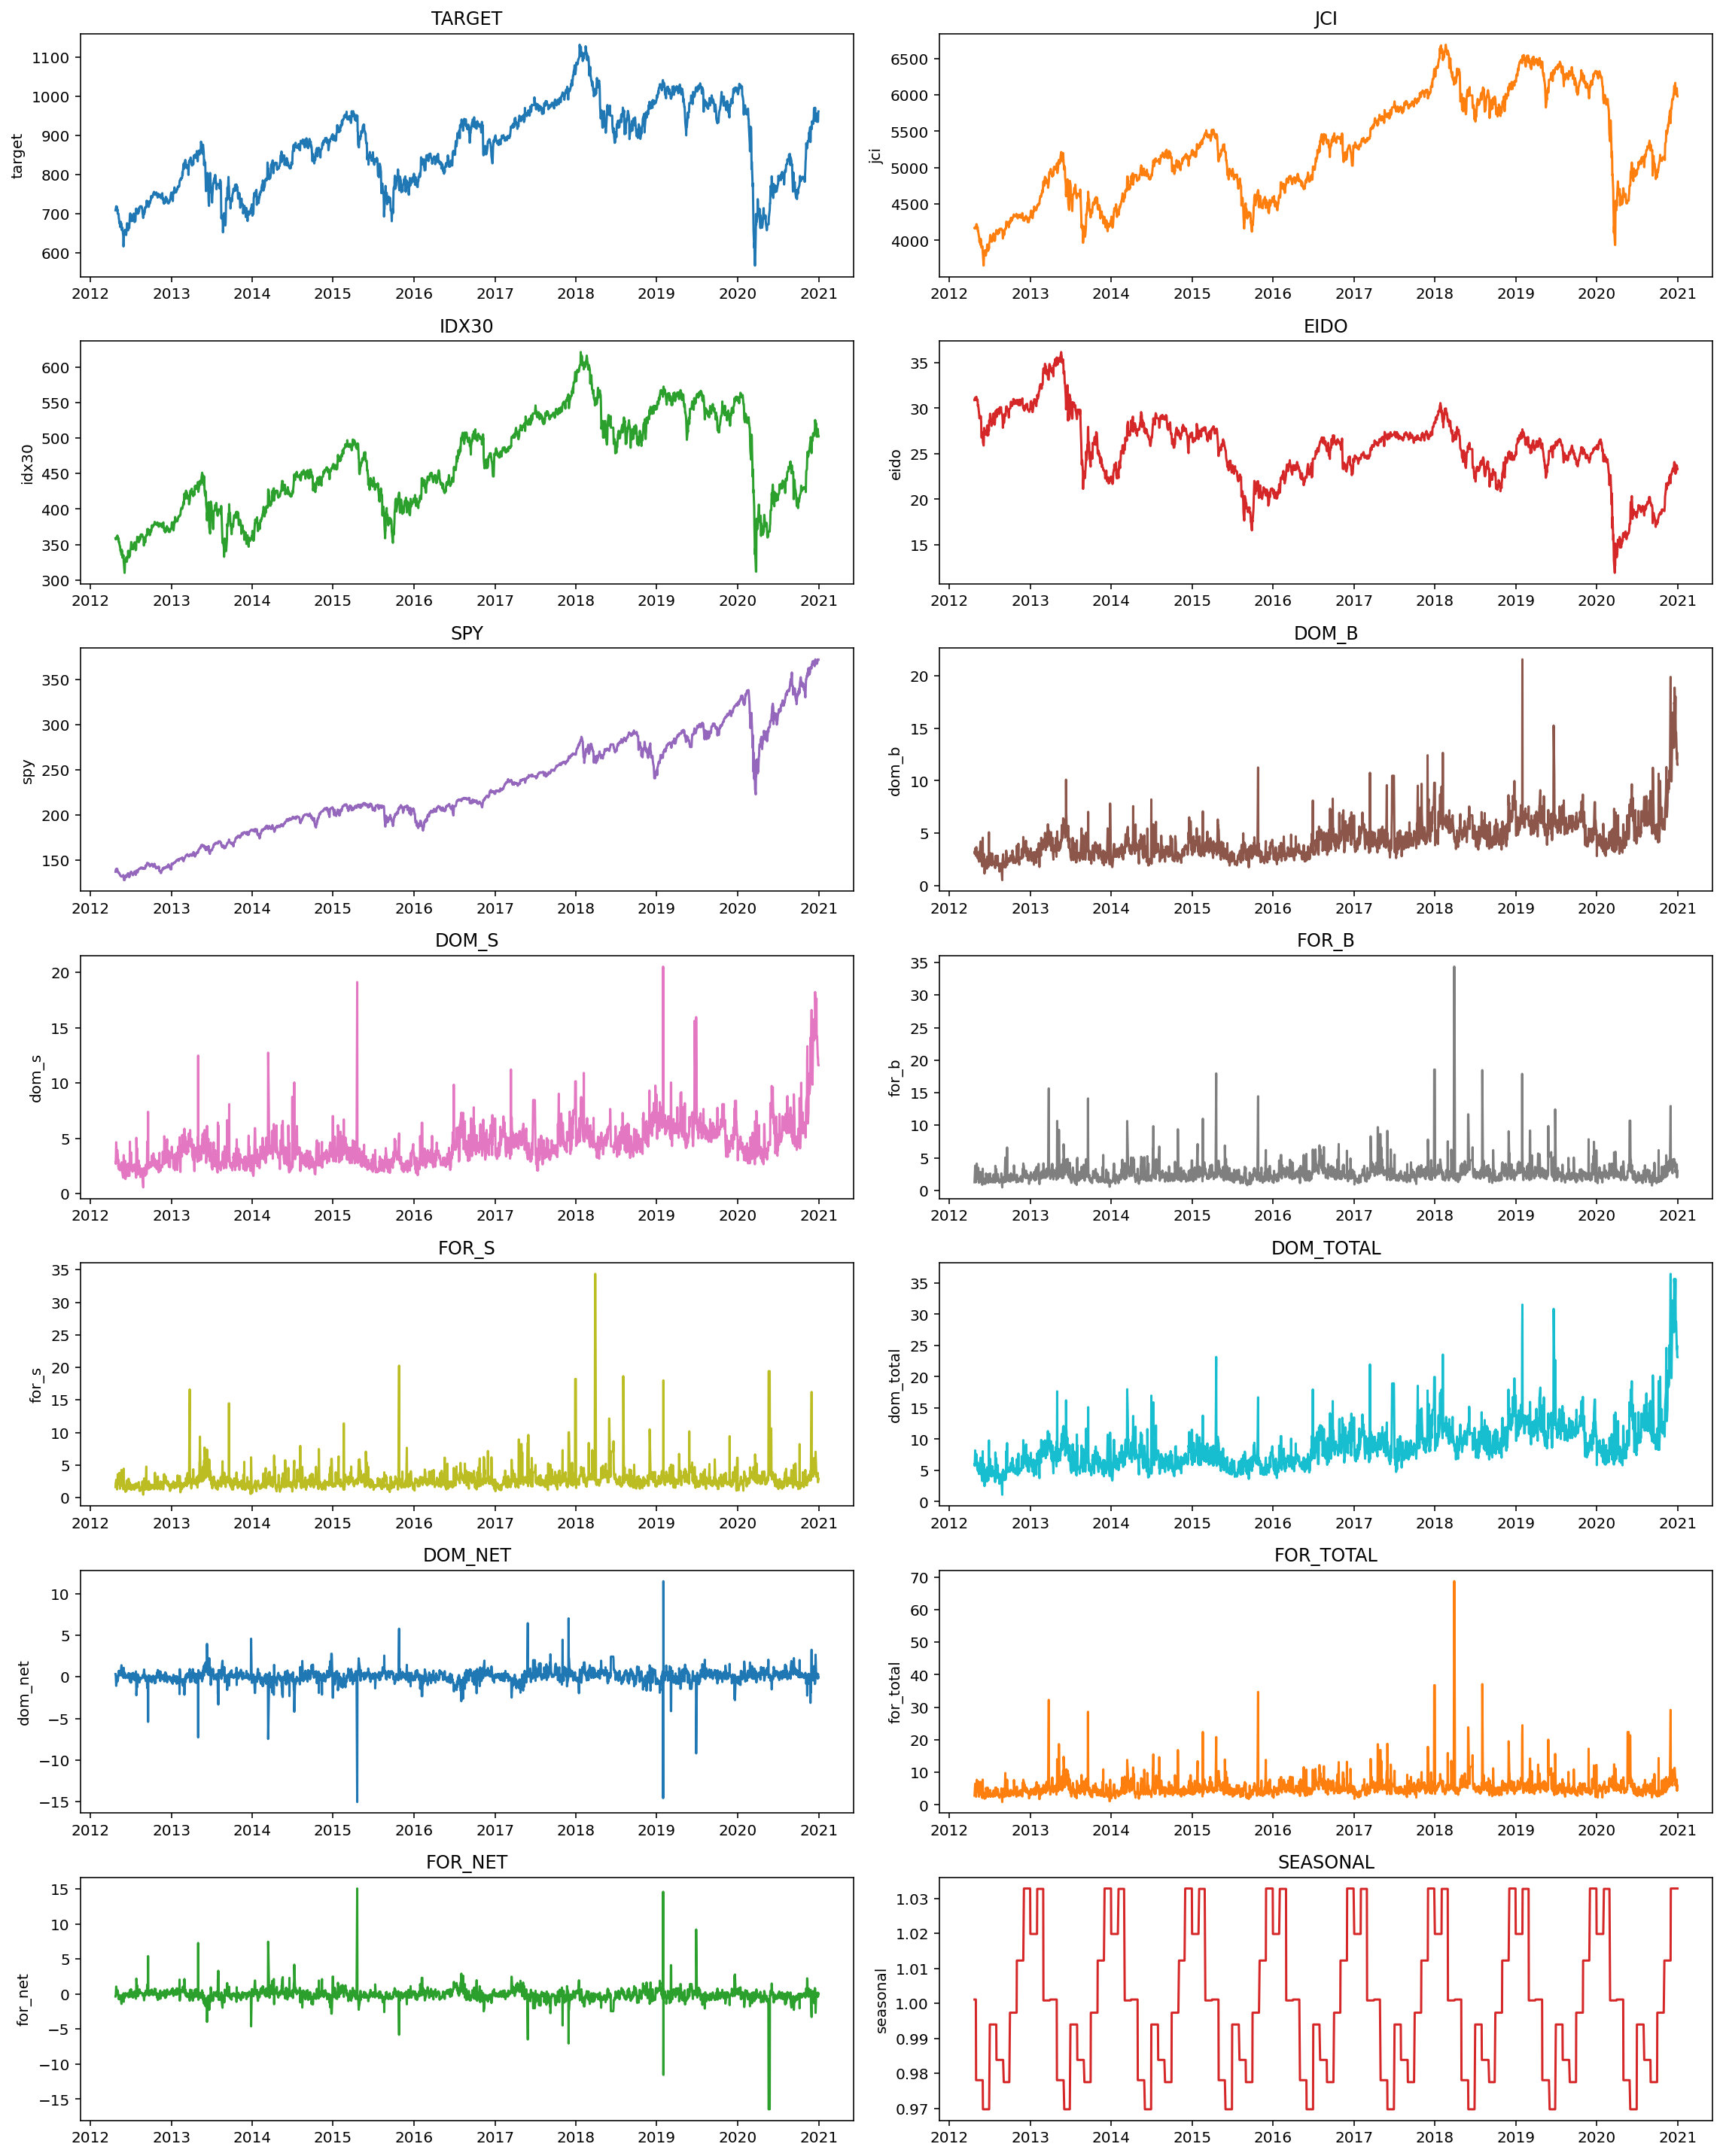

In [6]:
df_train = gf.load_from_pkl(f'{data_proc_dir}df_train_02.pkl')
df_valid = gf.load_from_pkl(f'{data_proc_dir}df_valid_02.pkl')
df_test = gf.load_from_pkl(f'{data_proc_dir}df_test_02.pkl')
df_train.name, df_valid.name, df_test.name = 'DATA TRAIN','DATA VALID','DATA TEST'
gf.plotting_line_all(dataframe=df_train)

In [23]:
'''
df_train_2 = gf.load_from_pkl(f'{data_proc_dir}df_train_02.pkl')
df_train_4 = gf.load_from_pkl(f'{data_proc_dir}df_train_04.pkl')

df_valid_2 = gf.load_from_pkl(f'{data_proc_dir}df_valid_02.pkl')
df_valid_4 = gf.load_from_pkl(f'{data_proc_dir}df_valid_04.pkl')

df_test_2 = gf.load_from_pkl(f'{data_proc_dir}df_test_02.pkl')
df_test_4 = gf.load_from_pkl(f'{data_proc_dir}df_test_04.pkl')

df_train_6 = pd.concat([df_train_2['target'].reindex(df_train_4.index), df_train_4.loc[:, ~df_train_4.columns.isin(['target'])]], axis=1)
df_valid_6 = pd.concat([df_valid_2['target'].reindex(df_valid_4.index), df_valid_4.loc[:, ~df_valid_4.columns.isin(['target'])]], axis=1)
df_test_6 = pd.concat([df_test_2['target'].reindex(df_test_4.index), df_test_4.loc[:, ~df_test_4.columns.isin(['target'])]], axis=1)


gf.save_as_pkl(obj=df_train_6, filename=f'{data_proc_dir}df_train_06_target_isnot_stationary.pkl', compress=5)
gf.save_as_pkl(obj=df_valid_6, filename=f'{data_proc_dir}df_valid_06_target_isnot_stationary.pkl', compress=5)
gf.save_as_pkl(obj=df_test_6, filename=f'{data_proc_dir}df_test_06_target_isnot_stationary.pkl', compress=5)
'''

In [2]:
'''
df_train = gf.load_from_pkl(f'{data_proc_dir}df_train_02.pkl')
df_valid = gf.load_from_pkl(f'{data_proc_dir}df_valid_02.pkl')
df_test = gf.load_from_pkl(f'{data_proc_dir}df_test_02.pkl')
df_train.name, df_valid.name, df_test.name = 'DATA TRAIN','DATA VALID','DATA TEST'
scaler = dp.std_scaler_fitting_all(train_dataframe=df_train)
df_train = dp.std_scaler_transform_all(dataframe=df_train, scaler=scaler)
df_valid = dp.std_scaler_transform_all(dataframe=df_valid, scaler=scaler)
df_test = dp.std_scaler_transform_all(dataframe=df_test, scaler=scaler)
df_train.name, df_valid.name, df_test.name = 'DATA TRAIN','DATA VALID','DATA TEST'

gf.save_as_pkl(obj=df_train, filename=f'{data_proc_dir}df_train_06_all_isnot_stationary_stdz.pkl', compress=5)
gf.save_as_pkl(obj=df_valid, filename=f'{data_proc_dir}df_valid_06_all_isnot_stationary_stdz.pkl', compress=5)
gf.save_as_pkl(obj=df_test, filename=f'{data_proc_dir}df_test_06_all_isnot_stationary_stdz.pkl', compress=5)
'''

In [4]:
'''
df_train = gf.load_from_pkl(f'{data_proc_dir}df_train_02.pkl')
df_valid = gf.load_from_pkl(f'{data_proc_dir}df_valid_02.pkl')
df_test = gf.load_from_pkl(f'{data_proc_dir}df_test_02.pkl')
df_train.name, df_valid.name, df_test.name = 'DATA TRAIN','DATA VALID','DATA TEST'
scaler = dp.std_scaler_fitting(train_dataframe=df_train)
df_train = dp.std_scaler_transform(dataframe=df_train, scaler=scaler)
df_valid = dp.std_scaler_transform(dataframe=df_valid, scaler=scaler)
df_test = dp.std_scaler_transform(dataframe=df_test, scaler=scaler)
df_train.name, df_valid.name, df_test.name = 'DATA TRAIN','DATA VALID','DATA TEST'

gf.save_as_pkl(obj=df_train, filename=f'{data_proc_dir}df_train_06_all_isnot_stationary_target_isnot_stdz.pkl', compress=5)
gf.save_as_pkl(obj=df_valid, filename=f'{data_proc_dir}df_valid_06_all_isnot_stationary_target_isnot_stdz.pkl', compress=5)
gf.save_as_pkl(obj=df_test, filename=f'{data_proc_dir}df_test_06_all_isnot_stationary_target_isnot_stdz.pkl', compress=5)
'''

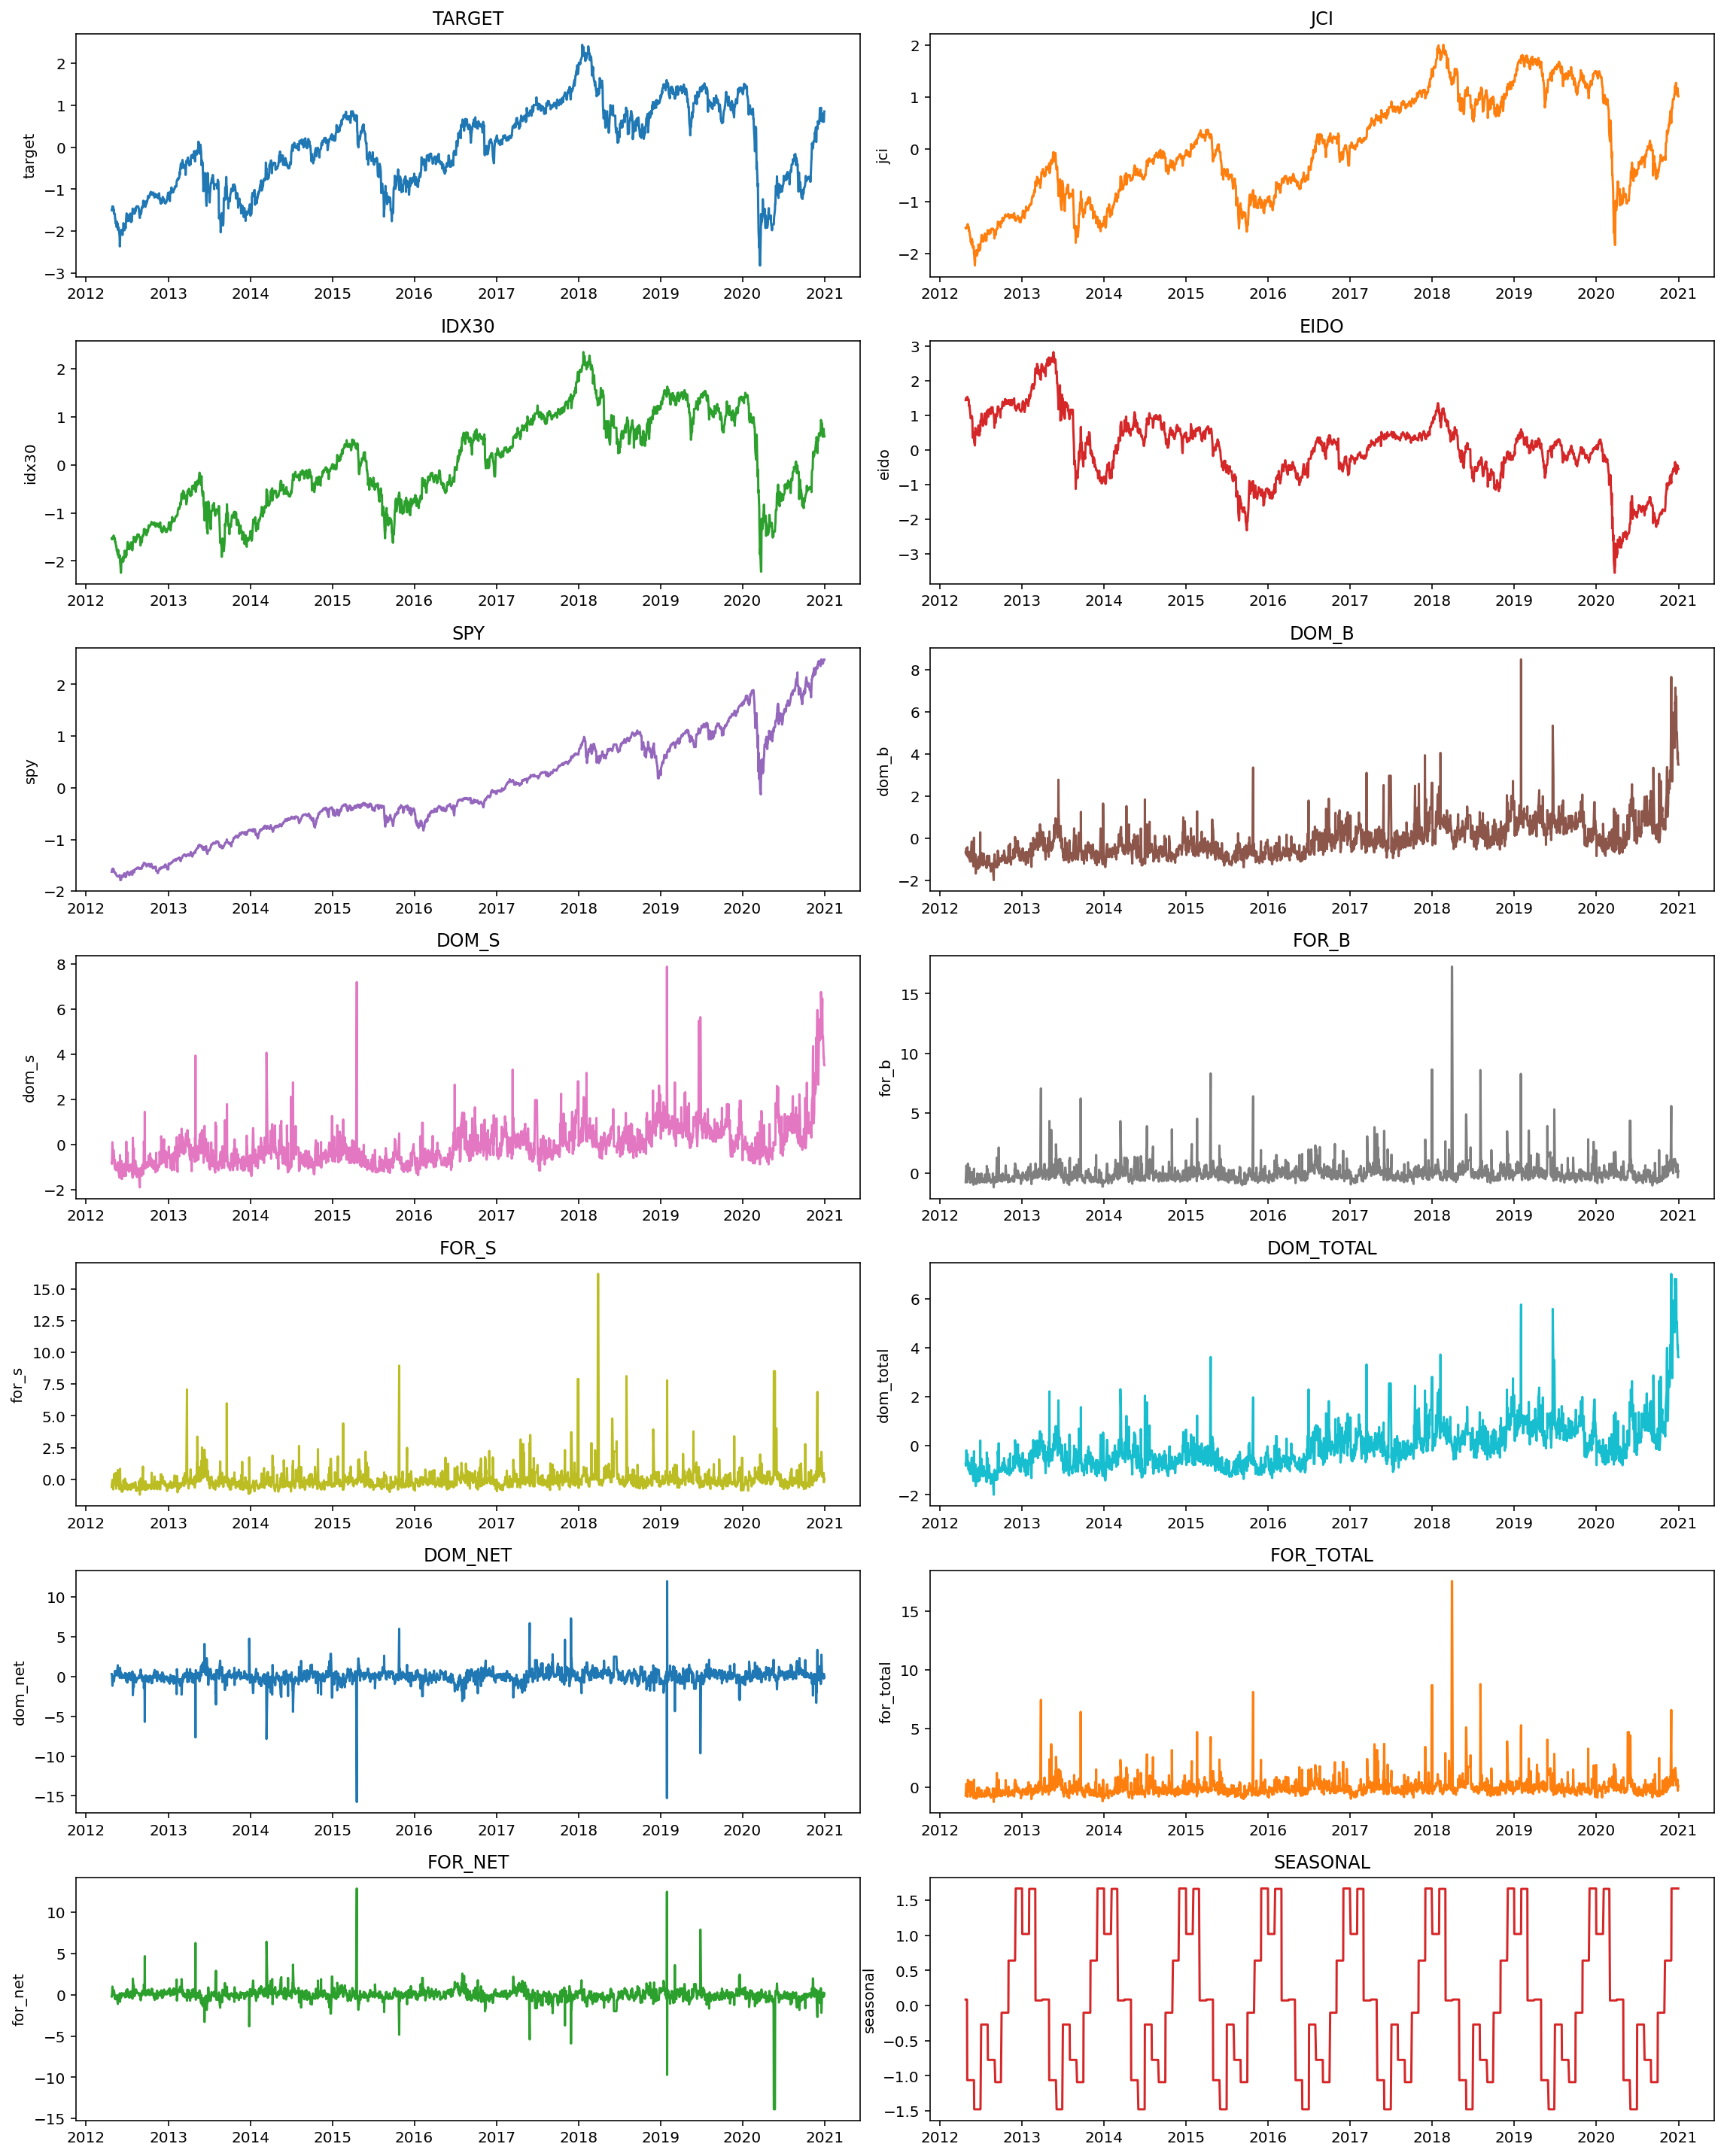

In [3]:
df_train = gf.load_from_pkl(f'{data_proc_dir}df_train_06_all_isnot_stationary_stdz.pkl')
df_valid = gf.load_from_pkl(f'{data_proc_dir}df_valid_06_all_isnot_stationary_stdz.pkl')
df_test = gf.load_from_pkl(f'{data_proc_dir}df_test_06_all_isnot_stationary_stdz.pkl')
df_train.name, df_valid.name, df_test.name = 'DATA TRAIN','DATA VALID','DATA TEST'
gf.plotting_line_all(dataframe=df_train)

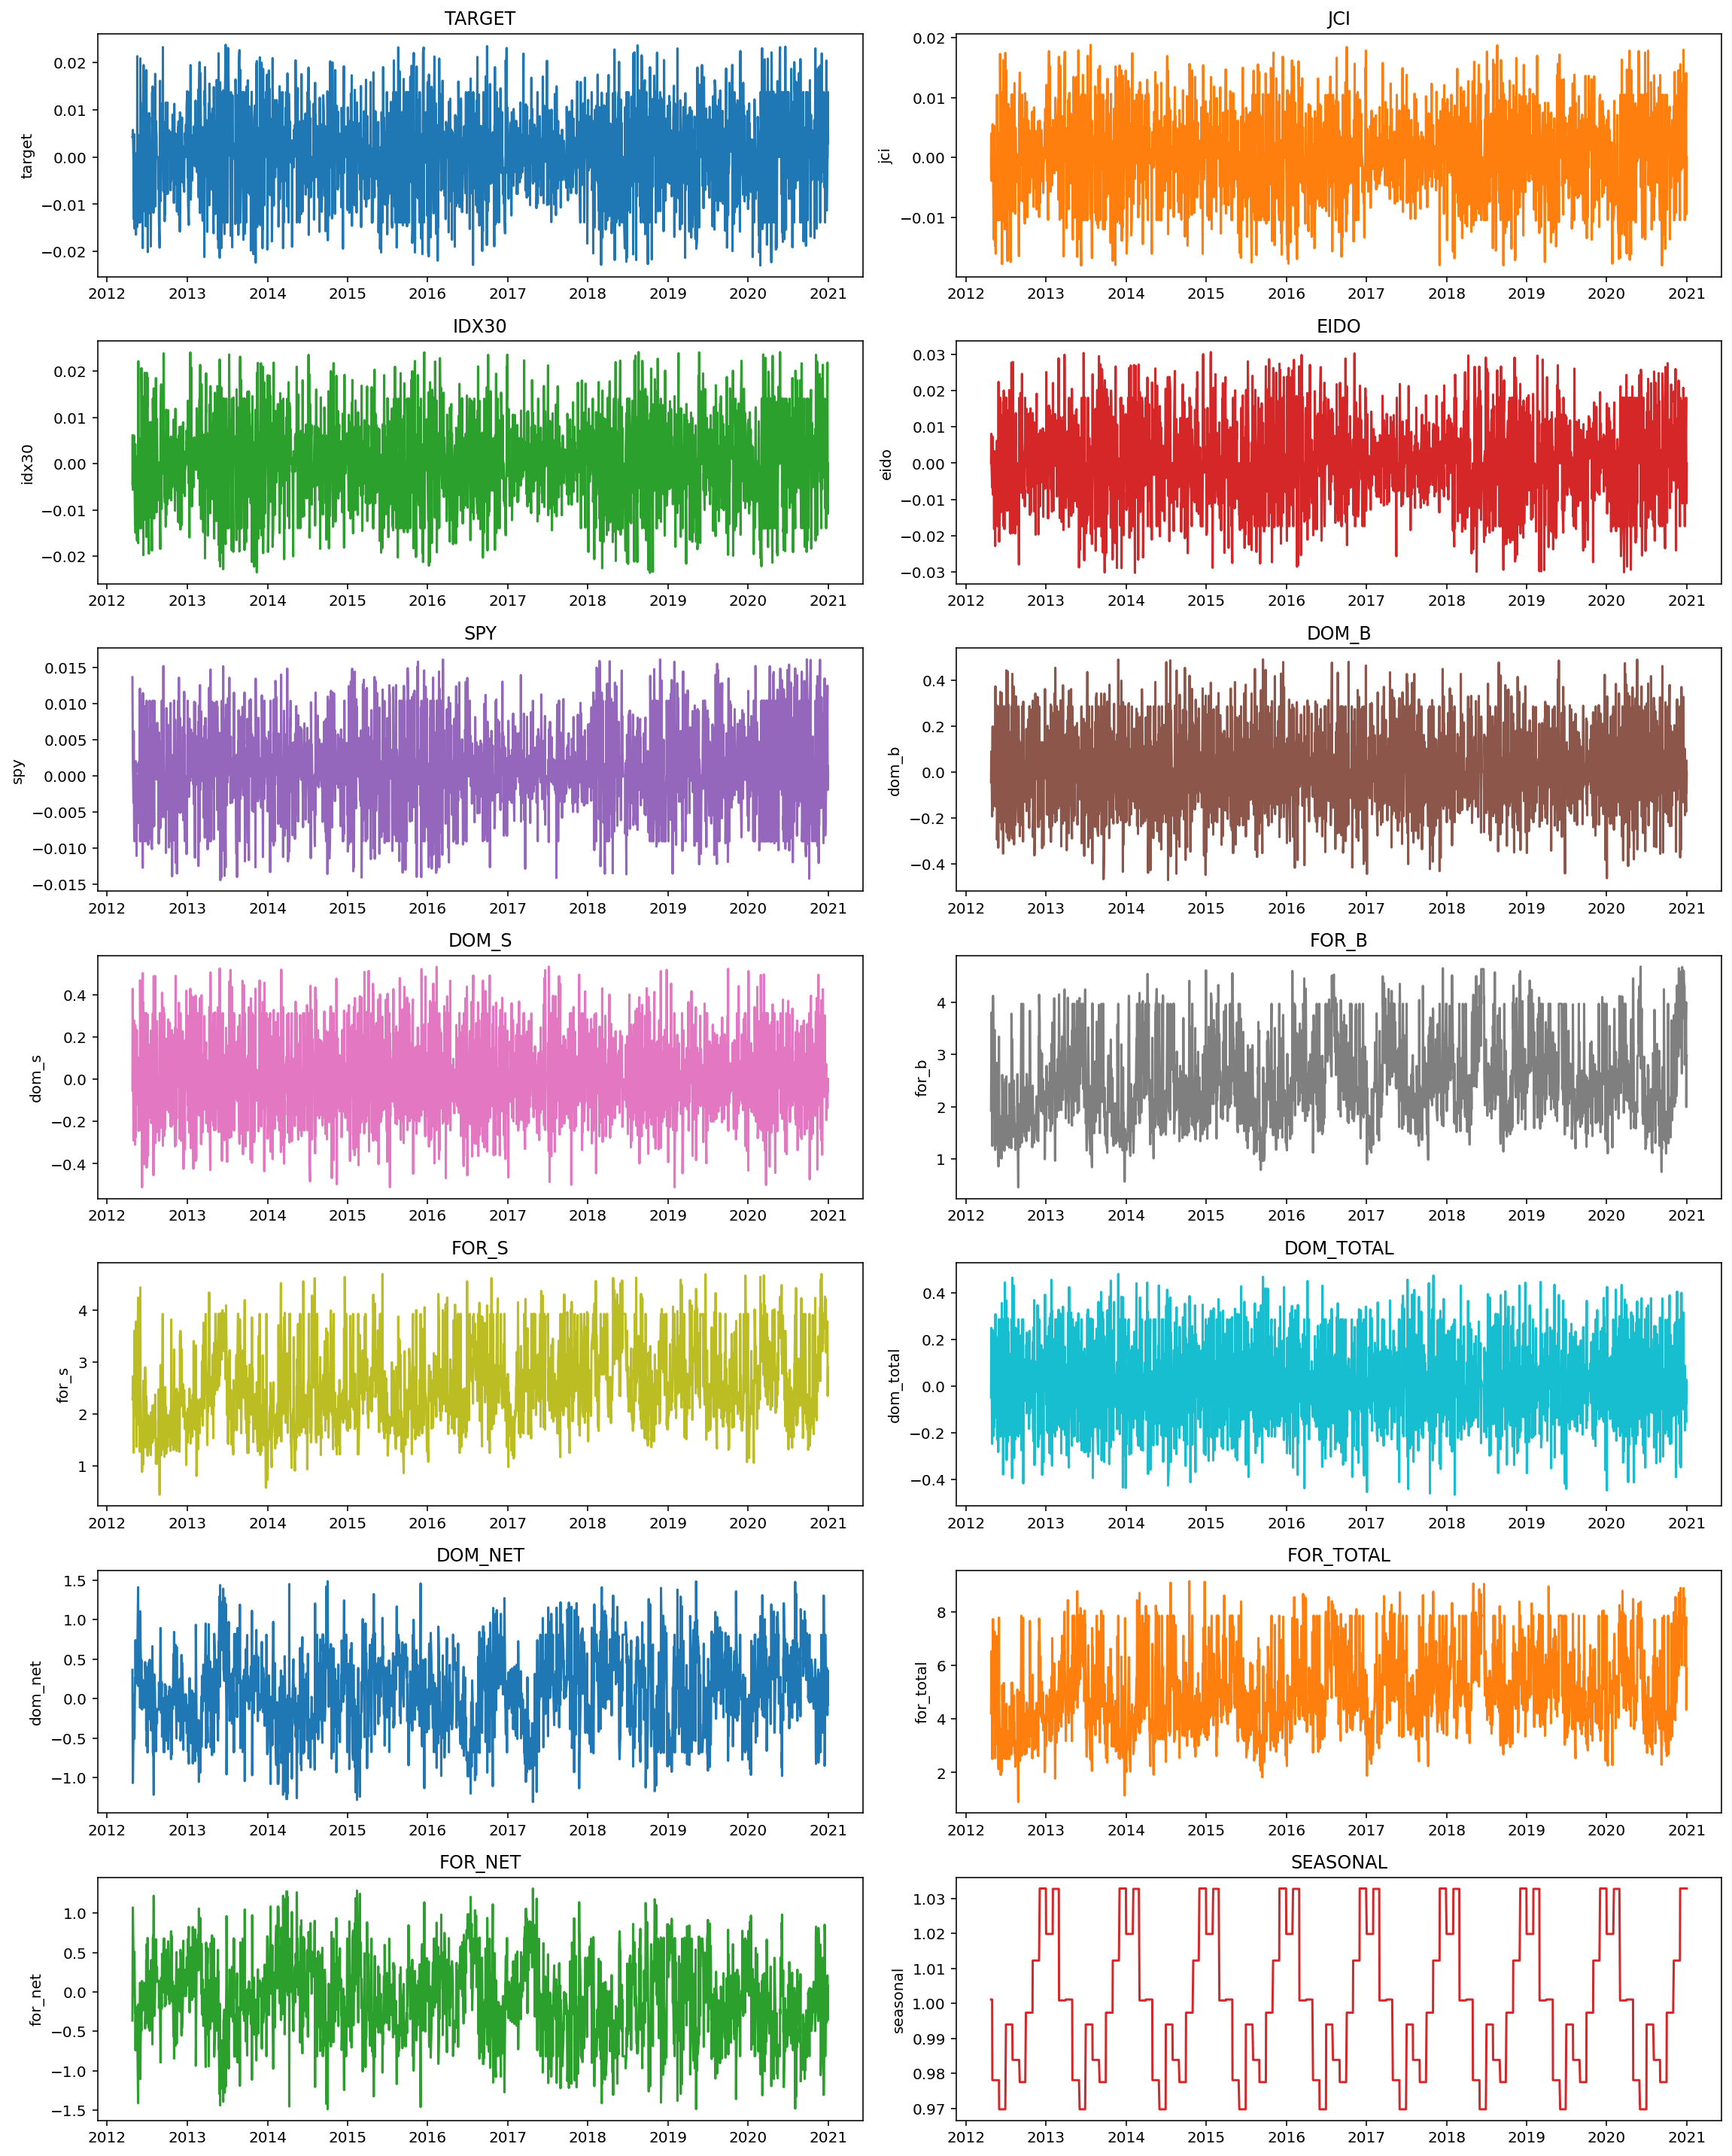

In [8]:
df_train = gf.load_from_pkl(f'{data_proc_dir}df_train_04.pkl')
df_valid = gf.load_from_pkl(f'{data_proc_dir}df_valid_04.pkl')
df_test = gf.load_from_pkl(f'{data_proc_dir}df_test_04.pkl')
df_train.name, df_valid.name, df_test.name = 'DATA TRAIN','DATA VALID','DATA TEST'
gf.plotting_line_all(dataframe=df_train)

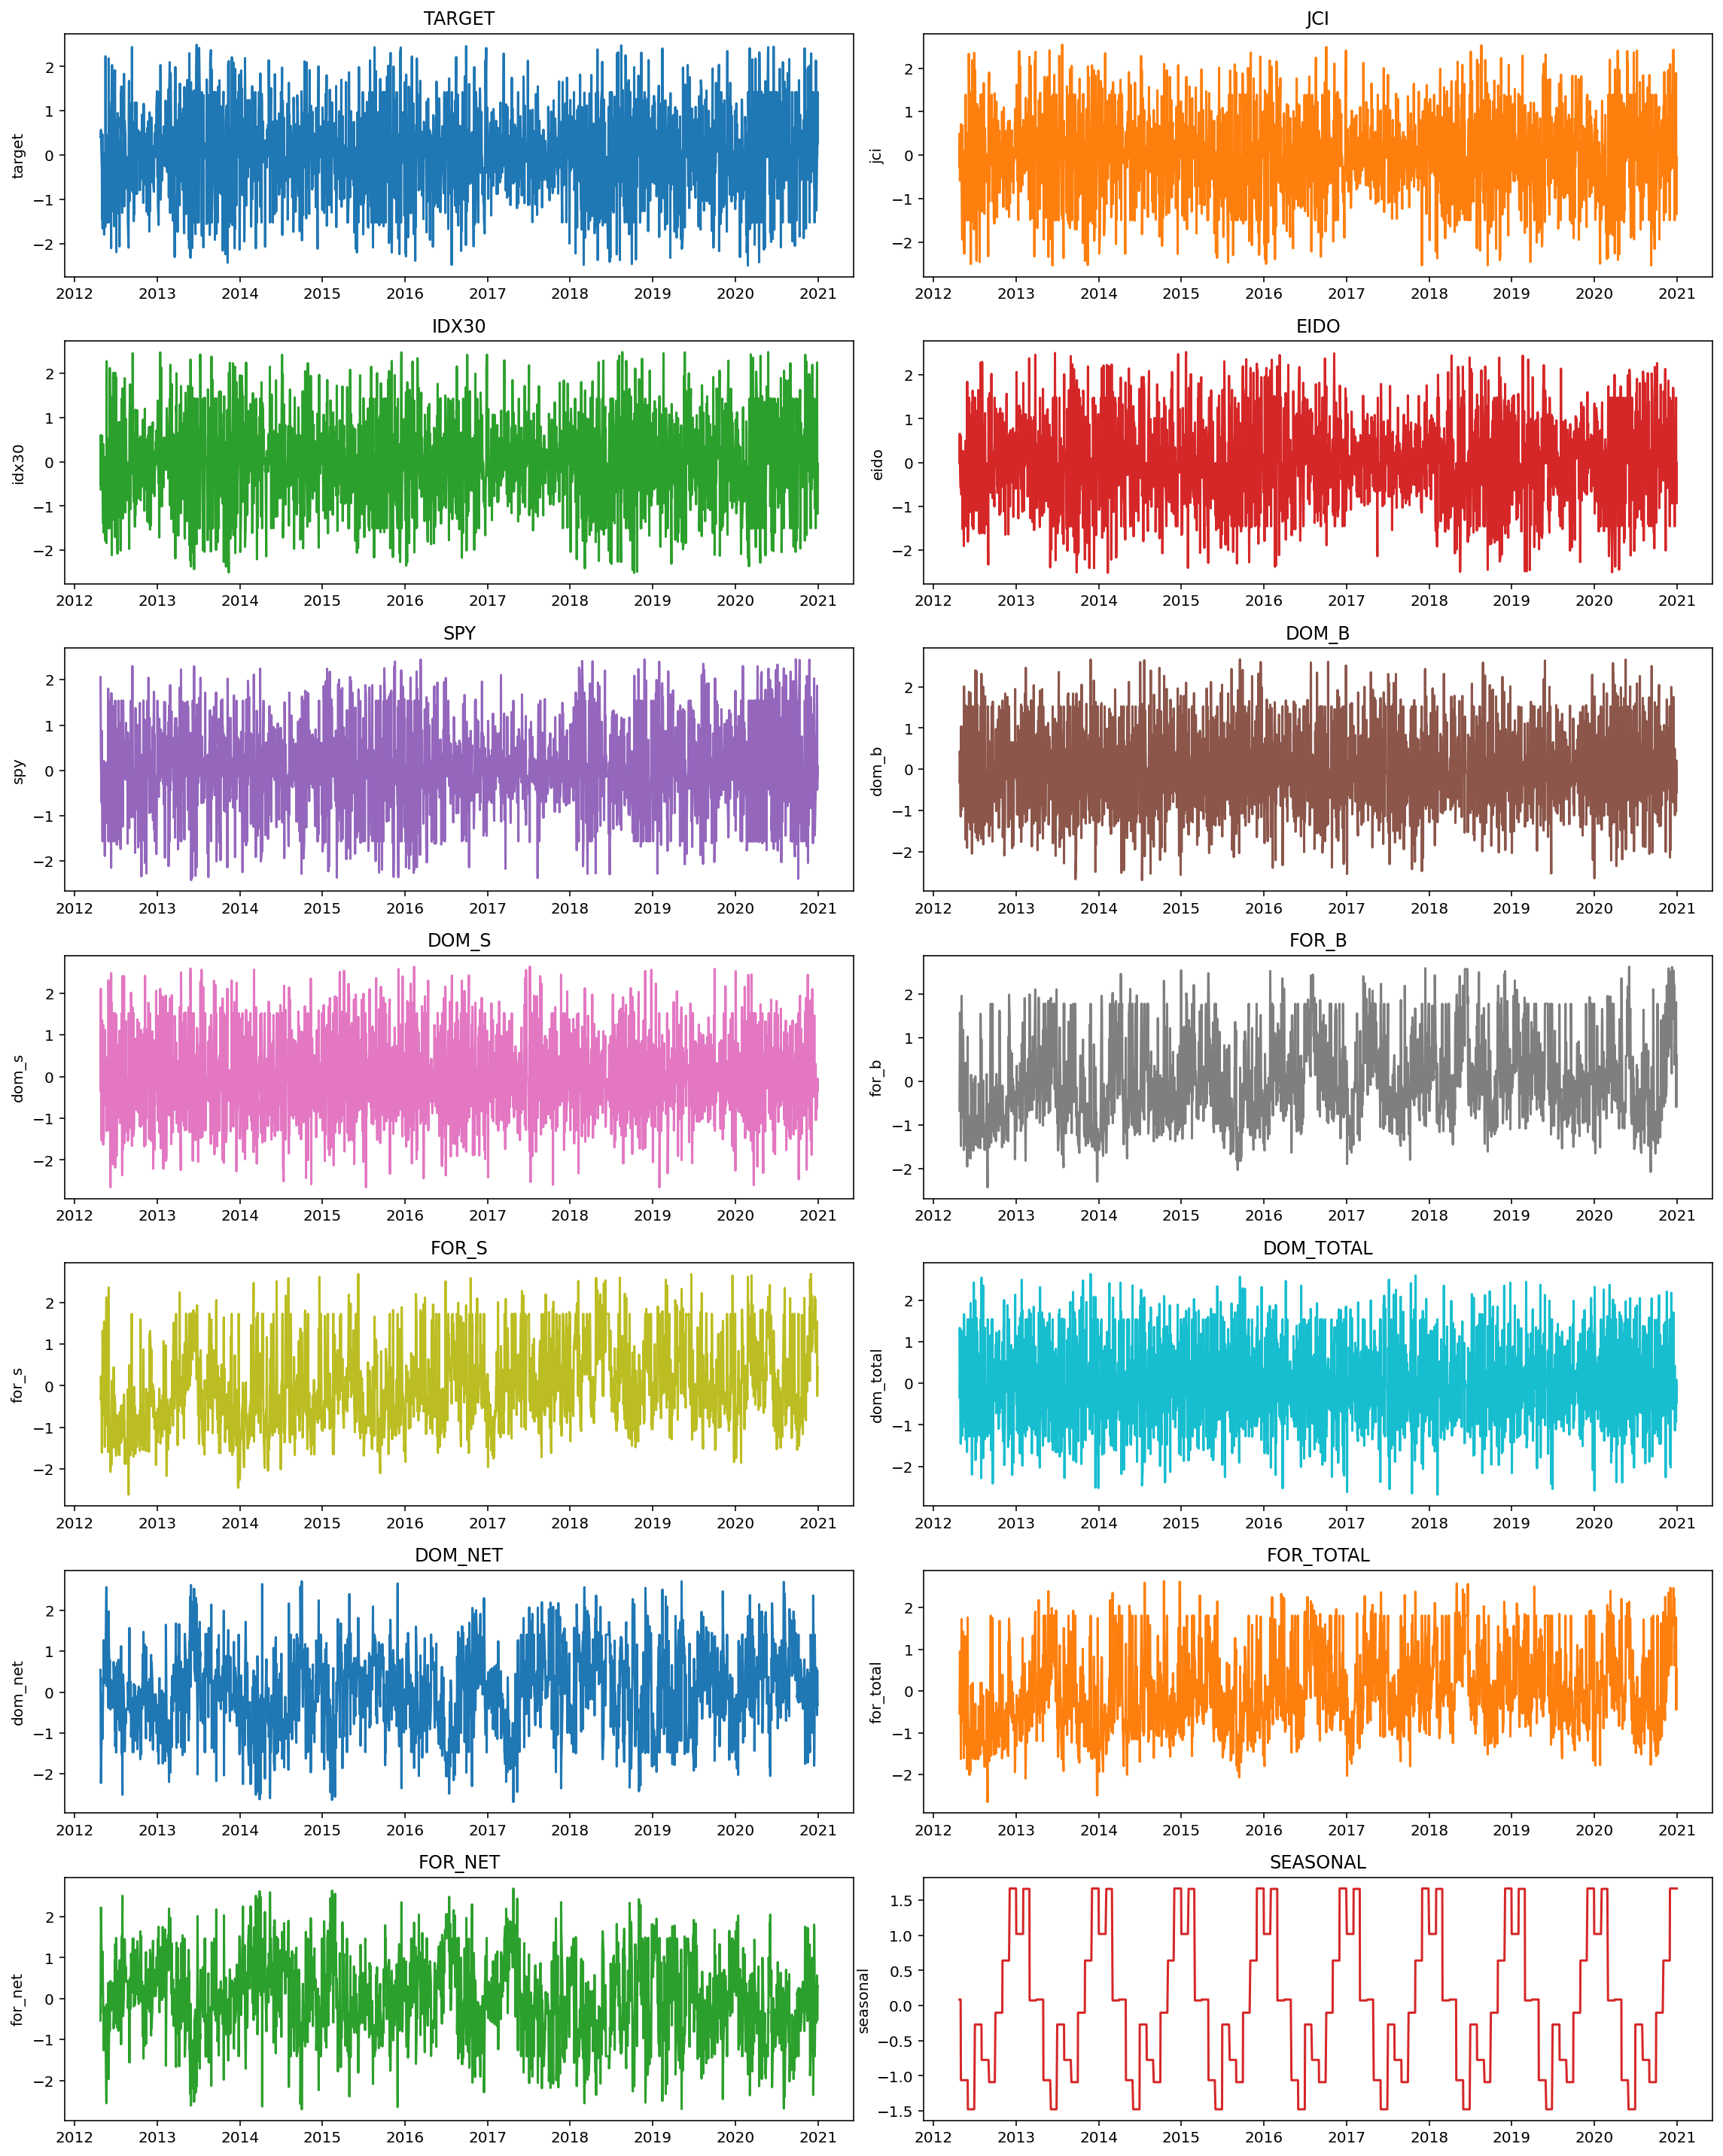

In [3]:


scaler = dp.std_scaler_fitting_all(train_dataframe=df_train)
df_train = dp.std_scaler_transform_all(dataframe=df_train, scaler=scaler)
df_valid = dp.std_scaler_transform_all(dataframe=df_valid, scaler=scaler)
df_test = dp.std_scaler_transform_all(dataframe=df_test, scaler=scaler)
gf.plotting_line_all(dataframe=df_train)

In [4]:
gf.save_as_pkl(obj=df_train, filename=f'{data_proc_dir}df_train_05_stdz_all.pkl', compress=5)
gf.save_as_pkl(obj=df_valid, filename=f'{data_proc_dir}df_valid_05_stdz_all.pkl', compress=5)
gf.save_as_pkl(obj=df_test, filename=f'{data_proc_dir}df_test_05_stdz_all.pkl', compress=5)